## 1. Inisialisasi Libary

In [45]:
import keras
import numpy as np
from keras.src.applications.densenet import layers
from keras.src.callbacks import EarlyStopping
from keras.layers import Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


## 2. Load Dataset

In [2]:
ratings = pd.read_csv("Books_rating.csv")
books = pd.read_csv("books_data.csv")

## 3. Data Understanding
### 3.1 Deskripsi Data

#### Ratings

In [3]:
ratings.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


#### Books

In [5]:
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


### 3.2 Univariate Analysis

#### 3.2.1 Books
Mengecek jumlah data unik pada judul dan kategori


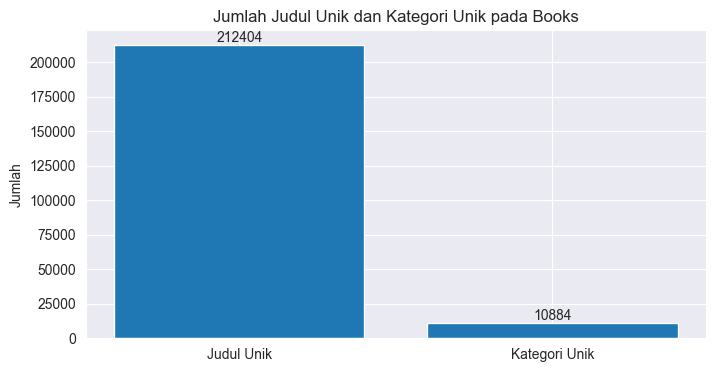

In [7]:
unique_title_count = len(books.Title.unique())
unique_categories_count = len(books.categories.unique())
plt.figure(figsize=(8, 4))
plt.bar(['Judul Unik', 'Kategori Unik'], [unique_title_count, unique_categories_count])
plt.ylabel('Jumlah')
plt.title('Jumlah Judul Unik dan Kategori Unik pada Books')

# Menambahkan label dengan jumlah data pasnya di atas batang
for i, count in enumerate([unique_title_count, unique_categories_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [9]:
books['categories']

0           ['Comics & Graphic Novels']
1         ['Biography & Autobiography']
2                          ['Religion']
3                           ['Fiction']
4                                   NaN
                      ...              
212399             ['Juvenile Fiction']
212400             ['Juvenile Fiction']
212401                              NaN
212402                      ['Fiction']
212403                              NaN
Name: categories, Length: 212404, dtype: object

Data categories diatas akan dihapus.

### 3.2.2 Ratings
Mengecek fitur yang akan digunakan pada data Ratings

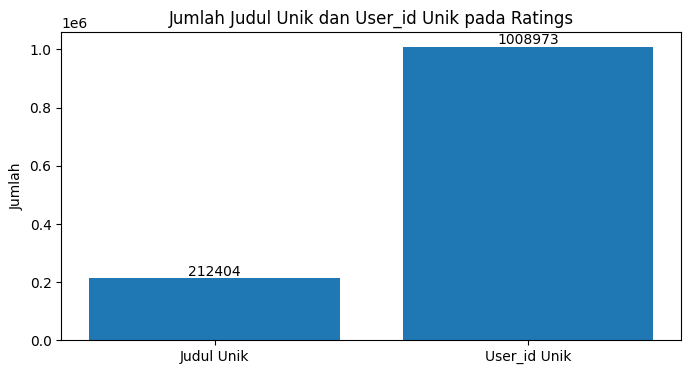

In [6]:
unique_title_count = len(ratings.Title.unique())
unique_user_count = len(ratings.User_id.unique())
plt.figure(figsize=(8, 4))
plt.bar(['Judul Unik', 'User_id Unik'], [unique_title_count, unique_user_count])
plt.ylabel('Jumlah')
plt.title('Jumlah Judul Unik dan User_id Unik pada Ratings')

# Menambahkan label dengan jumlah data pasnya di atas batang
for i, count in enumerate([unique_title_count, unique_user_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [11]:
ratings.User_id.value_counts().to_frame(name="Jumlah rating")

,Jumlah rating
User_id,
A14OJS0VWMOSWO,5795
AFVQZQ8PW0L,3606
A1D2C0WDCSHUWZ,3146
AHD101501WCN1,1995
A1X8VZWTOG8IS6,1804
...,...
A1DVHZFOA7SLCV,1
A2V8PZ1JVYYHXC,1
A1BDK3CZP7RU0K,1


## 4. Data Pra-Processing

### 4.1 Menghapus fitur yang tidak digunakan pada dataset

#### 4.1.1 Menghapus fitur pada ratings
Fitur 'Price', 'review/helpfulness', 'review/time', 'review/text' akan dihapus karena tidak dibutuhkan.

In [3]:
ratings = ratings.drop(columns=['Id', 'Price', 'review/helpfulness', 'review/time', 'review/text'])
ratings.head(10)

,Title,User_id,profileName,review/score,review/summary
0,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,Really Enjoyed It
2,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,Essential for every personal and Public Library
3,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment
4,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview
5,Dr. Seuss: American Icon,A2F6NONFUDB6UK,Malvin,4.0,One of America's greatest creative talents
6,Dr. Seuss: American Icon,A14OJS0VWMOSWO,Midwest Book Review,5.0,A memorably excellent survey of Dr. Seuss' man...
7,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,J. Squire,5.0,Academia At It's Best
8,Dr. Seuss: American Icon,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",5.0,And to think that I read it on the tram!
9,Dr. Seuss: American Icon,A3VA4XFS5WNJO3,Donald Burnside,4.0,Fascinating account of a genius at work


#### 4.1.2 Menghapus fitur pada books
Fitur 'Image', 'previewLink', 'infoLink', 'publishedDate', 'publisher', 'infoLink', dan 'description' akan dihapus karena tidak dibutukan.

In [4]:
books = books.drop(
    columns=['image', 'previewLink', 'infoLink', 'publishedDate', 'publisher', 'infoLink',
             'description'])
books.head(10)


,Title,authors,categories,ratingsCount
0,Its Only Art If Its Well Hung!,['Julie Strain'],['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,['David R. Ray'],['Religion'],NaN
3,Whispers of the Wicked Saints,['Veronica Haddon'],['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0
6,The Overbury affair (Avon),['Miriam Allen De Ford'],NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,['Lee Blessing'],NaN,3.0
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],['Social Science'],NaN


### 4.2 Mengganti nama kolom pada datasets

#### 4.2.1 Ratings

In [5]:
ratings = ratings.rename(
    columns={'Title': 'title', 'User_id': 'userId', 'review/score': 'score',
             'review/summary': 'summary'})
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   title        object 
 1   userId       object 
 2   profileName  object 
 3   score        float64
 4   summary      object 
dtypes: float64(1), object(4)
memory usage: 114.4+ MB


### 4.2.2 Books

In [6]:
books = books.rename(
    columns={'Title': 'title'})
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         212403 non-null  object 
 1   authors       180991 non-null  object 
 2   categories    171205 non-null  object 
 3   ratingsCount  49752 non-null   float64
dtypes: float64(1), object(3)
memory usage: 6.5+ MB


## 5. Data Preparation

### 5.1 Content Based Filtering

#### 5.1.1 Menangani Missing Value

In [7]:
books.isna().sum()

title                1
authors          31413
categories       41199
ratingsCount    162652
dtype: int64

In [8]:
books.dropna(subset=['title'], inplace=True)
books.dropna(subset=['ratingsCount'], inplace=True)
books.dropna(subset=['authors'], inplace=True)
books.dropna(subset=['categories'], inplace=True)
books

,title,authors,categories,ratingsCount
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0
31,Voices from the Farm: Adventures in Community ...,['Rupert Fike'],['Biography & Autobiography'],1.0
33,The Battleship Bismarck,['Stefan Draminski'],['History'],1.0
42,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0
43,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],['Foreign Language Study'],1.0
...,...,...,...,...
212374,Thin Within,"['Judy Halliday', 'Arthur Halliday']",['Health & Fitness'],9.0
212392,The Awakening and Selected Stories (Modern Lib...,['Kate Chopin'],['Adultery'],2.0
212394,Final things,['Jenny Offill'],['Fiction'],4.0
212399,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],['Juvenile Fiction'],2.0


Data pada buku tersisa *47269* dari *212404*

#### 5.1.2 Extraction Feature

In [9]:
tf = TfidfVectorizer()
tf.fit(books['categories'])
tf.get_feature_names_out()

array(['11030', '1339', '1453', ..., 'zen', 'état', 'états'], dtype=object)

In [29]:
tfidf_matrix = tf.fit_transform(books['categories'])
print(tfidf_matrix.shape)

(47269, 2671)


In [30]:
tfidf_dense_matrix = tfidf_matrix.toarray()

In [31]:
from scipy import sparse
tfidf_sparse_matrix = sparse.csr_matrix(tfidf_dense_matrix)

In [32]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=books.title
).sample(100, axis=1).sample(10, axis=0)

,businesswomen,cheyenne,piano,florence,1921,botany,postal,creek,education,caldecott,...,minh,depersonalization,places,creation,scientists,regions,toys,research,tax,european
title,,,,,,,,,,,,,,,,,,,,,
77 Rue Paradis (He met a gutter angel on the radway to hell),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Christian Assembly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Legal Guide For Starting & Running A Small Business (8th Edition),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lamb in the Laundry (Animal Ark Series #12),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Inventing Japan, 1853-1964 (Modern Library Chronicles)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rutherford B. Hayes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gathering the Sun / Recogiendo El Sol Un Abecedar: An Alphabet in Spanish and English,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Naval History of World War I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Black Man's Burden: Africa and the Curse of the Nation-State,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5.2 Collaborative Filtering

#### 5.2.1 Merge Data Books & Ratings
Merge akan dilakukan berdasarkan title dan akan disimpan di variable baru

In [10]:
rating_books = pd.merge(books, ratings, on='title', how='left')

In [11]:
rating_books


,title,authors,categories,ratingsCount,userId,profileName,score,summary
0,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,ARI272XF8TOL4,Christopher J. Bray,5.0,Ecclesiological Milestone
1,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,A36TPZSH8LBT1,haskell,5.0,Early Christian development of the Church
2,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,ANX3DDV12ZRRU,GodsBreath.wordpress,4.0,An Excellent Presentation of the Beliefs of th...
3,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,A2H2LORTA5EZY2,Edward E. Howe,4.0,Christ is Lord
4,Voices from the Farm: Adventures in Community ...,['Rupert Fike'],['Biography & Autobiography'],1.0,A3W1KIKQ93S62,John Washington,5.0,Excellent perspective on communal living and h...
...,...,...,...,...,...,...,...,...
1549918,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],['Juvenile Fiction'],2.0,NaN,NaN,5.0,Best Book I have Ever Read
1549919,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A27UK6LI19NDNO,"maryzeus ""maryzzz""",1.0,very fractured
1549920,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A3N4CDTH72ZVDS,Matko Vladanovic,4.0,The quest for the holy Grail
1549921,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A16IDI50I9SR5V,"""tyuro""",3.0,Looking For Spirituality in All The Wrong Places


#### 5.2.2 Menangani Missing Value pada data rating_books yang telah di merge

In [12]:
rating_books.isna().sum()

title                0
authors              0
categories           0
ratingsCount         0
userId          305631
profileName     305701
score                0
summary            228
dtype: int64

In [13]:
rating_books.dropna(subset=['userId'], inplace=True)
rating_books.dropna(subset=['profileName'], inplace=True)
rating_books.dropna(subset=['summary'], inplace=True)

In [13]:
rating_books

,title,authors,categories,ratingsCount,userId,profileName,score,summary
0,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,ARI272XF8TOL4,Christopher J. Bray,5.0,Ecclesiological Milestone
1,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,A36TPZSH8LBT1,haskell,5.0,Early Christian development of the Church
2,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,ANX3DDV12ZRRU,GodsBreath.wordpress,4.0,An Excellent Presentation of the Beliefs of th...
3,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],5.0,A2H2LORTA5EZY2,Edward E. Howe,4.0,Christ is Lord
4,Voices from the Farm: Adventures in Community ...,['Rupert Fike'],['Biography & Autobiography'],1.0,A3W1KIKQ93S62,John Washington,5.0,Excellent perspective on communal living and h...
...,...,...,...,...,...,...,...,...
1549916,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],['Juvenile Fiction'],2.0,A3T6R1GAFRP1I9,jwinter,4.0,Good and sad book!!!!
1549919,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A27UK6LI19NDNO,"maryzeus ""maryzzz""",1.0,very fractured
1549920,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A3N4CDTH72ZVDS,Matko Vladanovic,4.0,The quest for the holy Grail
1549921,The Autograph Man,['Zadie Smith'],['Fiction'],19.0,A16IDI50I9SR5V,"""tyuro""",3.0,Looking For Spirituality in All The Wrong Places


#### 5.2.3 Filrasi berbasis jumlah
Untuk menghilangkan noise pada data. Dalam kasus ini, ada banyak pengguna yang hanya memberikan sedikit skor, dan skor tersebut bisa jadi menyesatkan model.

In [14]:
x = rating_books.groupby('userId').count()['score'] > 20
considerable_users = x[x].index
filtered_rating = rating_books[rating_books['userId'].isin(considerable_users)]
filtered_rating

,title,authors,categories,ratingsCount,userId,profileName,score,summary
5,Voices from the Farm: Adventures in Community ...,['Rupert Fike'],['Biography & Autobiography'],1.0,A1ER5AYS3FQ9O3,"K. Corn ""reviewer""",5.0,Intense memoir told in brief segments by forme...
17,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A2VCGJLKGK2WJJ,Rebecca Herman,5.0,My new favorite book from the Avon True Romanc...
23,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A1H72DULSEGDX7,hiphopgirl_1000,5.0,A great romance
33,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A1DJMMJ4OQ2712,"""celes1""",2.0,Not the best in the series
96,Communicating with Orcas - The Whales' Perspec...,['Mary J. Getten'],['Local author'],1.0,A14OJS0VWMOSWO,Midwest Book Review,5.0,Makes for fascinating reading.
...,...,...,...,...,...,...,...,...
1549849,Calder Pride,['Janet Dailey'],['Fiction'],1.0,A170ILOIU1PZN7,Romance junkie,5.0,EXCELLENT!
1549856,The Road Back,['Erich Maria Remarque'],['Fiction'],6.0,A28ZOZJU5A30Z0,Sean K,5.0,Much harder than surviving the war
1549869,Thin Within,"['Judy Halliday', 'Arthur Halliday']",['Health & Fitness'],9.0,A2HM0BZWQRV1EF,"Blaine Greenfield ""eclectic reader""",5.0,Imagine achieving permanent weight loss withou...
1549890,Final things,['Jenny Offill'],['Fiction'],4.0,A148R759F9JW0A,othoniaboys,4.0,The only good one is a dead one


#### 5.2.4 Encoding dan Decoding

In [15]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = filtered_rating['userId'].unique().tolist()
print('list userID: ', user_ids[:10])

list userID:  ['A1ER5AYS3FQ9O3', 'A2VCGJLKGK2WJJ', 'A1H72DULSEGDX7', 'A1DJMMJ4OQ2712', 'A14OJS0VWMOSWO', 'AUHG8KSHI529U', 'A1RJD10TTI568L', 'A2L7N2U5Z316ZE', 'A2KBHSK5BS35BH', 'A2WZON0QPX7C9X']


In [16]:
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Cetak 10 contoh encoding userID
print('10 contoh encoding userID:')
for user_id, encoded_id in list(user_to_user_encoded.items())[:10]:
    print(f'UserID: {user_id} -> Encoded: {encoded_id}')



10 contoh encoding userID:
UserID: A1ER5AYS3FQ9O3 -> Encoded: 0
UserID: A2VCGJLKGK2WJJ -> Encoded: 1
UserID: A1H72DULSEGDX7 -> Encoded: 2
UserID: A1DJMMJ4OQ2712 -> Encoded: 3
UserID: A14OJS0VWMOSWO -> Encoded: 4
UserID: AUHG8KSHI529U -> Encoded: 5
UserID: A1RJD10TTI568L -> Encoded: 6
UserID: A2L7N2U5Z316ZE -> Encoded: 7
UserID: A2KBHSK5BS35BH -> Encoded: 8
UserID: A2WZON0QPX7C9X -> Encoded: 9


In [17]:
# Melakukan proses decoding dari angka ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Cetak 10 contoh decoding angka ke userID
print('10 contoh decoding angka ke userID:')
for encoded_id, user_id in list(user_encoded_to_user.items())[:10]:
    print(f'Encoded: {encoded_id} -> UserID: {user_id}')


10 contoh decoding angka ke userID:
Encoded: 0 -> UserID: A1ER5AYS3FQ9O3
Encoded: 1 -> UserID: A2VCGJLKGK2WJJ
Encoded: 2 -> UserID: A1H72DULSEGDX7
Encoded: 3 -> UserID: A1DJMMJ4OQ2712
Encoded: 4 -> UserID: A14OJS0VWMOSWO
Encoded: 5 -> UserID: AUHG8KSHI529U
Encoded: 6 -> UserID: A1RJD10TTI568L
Encoded: 7 -> UserID: A2L7N2U5Z316ZE
Encoded: 8 -> UserID: A2KBHSK5BS35BH
Encoded: 9 -> UserID: A2WZON0QPX7C9X


In [18]:
# Mengubah titleBook menjadi list tanpa nilai yang sama
title_ids = filtered_rating['title'].unique().tolist()

print('list titleId: ', title_ids[:10])

list titleId:  ['Voices from the Farm: Adventures in Community Living', 'Tess and the Highlander', "Communicating with Orcas - The Whales' Perspective", "The Impatient Gardener's Lawn Book", 'The Complete Illustrated Guide to Chinese Medicine: A Comprehensive System for Health and Fitness', 'Night World: Daughters Of Darkness', 'America at 1750: A Social Portrait', 'Perry Mason in the Case of Too Many Murders', "The Rabbi's Cat", "From Potter's Field"]


In [19]:
# Melakukan encoding userID
title_to_title_encode = {x: i for i, x in enumerate(title_ids)}

# Cetak 10 contoh encoding userID
print('10 contoh encoding title:')
for title, encoded_id in list(title_to_title_encode.items())[:10]:
    print(f'Title: {title} -> Encoded: {encoded_id}')


10 contoh encoding title:
Title: Voices from the Farm: Adventures in Community Living -> Encoded: 0
Title: Tess and the Highlander -> Encoded: 1
Title: Communicating with Orcas - The Whales' Perspective -> Encoded: 2
Title: The Impatient Gardener's Lawn Book -> Encoded: 3
Title: The Complete Illustrated Guide to Chinese Medicine: A Comprehensive System for Health and Fitness -> Encoded: 4
Title: Night World: Daughters Of Darkness -> Encoded: 5
Title: America at 1750: A Social Portrait -> Encoded: 6
Title: Perry Mason in the Case of Too Many Murders -> Encoded: 7
Title: The Rabbi's Cat -> Encoded: 8
Title: From Potter's Field -> Encoded: 9


In [20]:
# Melakukan proses decoding dari angka ke userID
title_encode_to_title = {i: x for i, x in enumerate(title_ids)}

# Cetak 10 contoh decoding angka ke userID
print('10 contoh decoding angka ke title:')
for encoded_id, title in list(title_encode_to_title.items())[:10]:
    print(f'Encoded: {encoded_id} -> UserID: {title}')


10 contoh decoding angka ke title:
Encoded: 0 -> UserID: Voices from the Farm: Adventures in Community Living
Encoded: 1 -> UserID: Tess and the Highlander
Encoded: 2 -> UserID: Communicating with Orcas - The Whales' Perspective
Encoded: 3 -> UserID: The Impatient Gardener's Lawn Book
Encoded: 4 -> UserID: The Complete Illustrated Guide to Chinese Medicine: A Comprehensive System for Health and Fitness
Encoded: 5 -> UserID: Night World: Daughters Of Darkness
Encoded: 6 -> UserID: America at 1750: A Social Portrait
Encoded: 7 -> UserID: Perry Mason in the Case of Too Many Murders
Encoded: 8 -> UserID: The Rabbi's Cat
Encoded: 9 -> UserID: From Potter's Field


In [21]:
# Mapping userID ke dataframe user
filtered_rating['user'] = filtered_rating['userId'].map(user_to_user_encoded)

# Mapping title ke dataframe bookId
filtered_rating['bookId'] = filtered_rating['title'].map(title_to_title_encode)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24556\1679004981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rating['user'] = filtered_rating['userId'].map(user_to_user_encoded)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24556\1679004981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rating['bookId'] = filtered_rating['title'].map(title_to_title_encode)


In [22]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah books
num_book = len(title_encode_to_title)
print(num_book)

# Nilai minimum rating
min_rating = min(filtered_rating['score'])

# Nilai maksimal rating
max_rating = max(filtered_rating['score'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

4077
26991
Number of User: 4077, Number of Book: 26991, Min Rating: 1.0, Max Rating: 5.0


In [23]:
filtered_rating

,title,authors,categories,ratingsCount,userId,profileName,score,summary,user,bookId
5,Voices from the Farm: Adventures in Community ...,['Rupert Fike'],['Biography & Autobiography'],1.0,A1ER5AYS3FQ9O3,"K. Corn ""reviewer""",5.0,Intense memoir told in brief segments by forme...,0,0
17,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A2VCGJLKGK2WJJ,Rebecca Herman,5.0,My new favorite book from the Avon True Romanc...,1,1
23,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A1H72DULSEGDX7,hiphopgirl_1000,5.0,A great romance,2,1
33,Tess and the Highlander,['May Mcgoldrick'],['Juvenile Fiction'],2.0,A1DJMMJ4OQ2712,"""celes1""",2.0,Not the best in the series,3,1
96,Communicating with Orcas - The Whales' Perspec...,['Mary J. Getten'],['Local author'],1.0,A14OJS0VWMOSWO,Midwest Book Review,5.0,Makes for fascinating reading.,4,2
...,...,...,...,...,...,...,...,...,...,...
1549849,Calder Pride,['Janet Dailey'],['Fiction'],1.0,A170ILOIU1PZN7,Romance junkie,5.0,EXCELLENT!,3684,26986
1549856,The Road Back,['Erich Maria Remarque'],['Fiction'],6.0,A28ZOZJU5A30Z0,Sean K,5.0,Much harder than surviving the war,2106,26987
1549869,Thin Within,"['Judy Halliday', 'Arthur Halliday']",['Health & Fitness'],9.0,A2HM0BZWQRV1EF,"Blaine Greenfield ""eclectic reader""",5.0,Imagine achieving permanent weight loss withou...,1425,26988
1549890,Final things,['Jenny Offill'],['Fiction'],4.0,A148R759F9JW0A,othoniaboys,4.0,The only good one is a dead one,335,26989


#### 5.2.5 Shuffle

In [23]:
# Mengacak dataset
filtered_rating = filtered_rating.sample(frac=1, random_state=42)
filtered_rating

,title,authors,categories,ratingsCount,userId,profileName,score,summary,user,bookId
808004,"A Feast for Crows (A Song of Ice and Fire, Boo...",['George R. R. Martin'],['Fiction'],3116.0,AQP1VPK16SVWM,"Wayne Klein ""If at first the idea is not absu...",3.0,Feast suffers because only half the meal is pr...,3227,12128
1139640,Walter Was Worried,['Laura Vaccaro Seeger'],['Juvenile Fiction'],6.0,A1SYLII0808HD6,M. Allen Greenbaum,5.0,4 1/2 A Storm of Emotion,1380,18388
1082303,The Sunne in Splendour,['Sharon Kay Penman'],['Fiction'],51.0,A1XC6NAEF7RKZ0,"Laurence R. Bachmann ""LRB""",3.0,Very interesting; very well-written; implodes ...,2366,17314
848646,A Breath of Snow and Ashes (Outlander),['Diana Gabaldon'],['Fiction'],81.0,AN8C7BGR98HLN,"Nash Black ""Troubadour""",5.0,An Epic Return,665,12793
757849,Holes,['Louis Sachar'],['Juvenile Fiction'],105.0,AZ216MK9KO1S0,"purple ""pioneers""",4.0,He is only responsible,1728,11098
...,...,...,...,...,...,...,...,...,...,...
857120,OF MICE AND MEN,['John Steinbeck'],['Fiction'],187.0,A43P0V05RM3SR,Evelyn Horan,5.0,Am Enduring Classic for All Time,666,12888
730580,A Wanted Man,['Lee Child'],['Fiction'],71.0,AFVQZQ8PW0L,Harriet Klausner,4.0,fine western romance,90,10701
951508,David Copperfield,['Charles Dickens'],['Fiction'],6.0,ATN1SSKTJD8Z8,M. Strong,5.0,Dickens' favorite Dickens... with good reason.,964,14671
1069516,The Stainless Steel Rat,['Harry Harrison'],"['DiGriz, James Bolivar (Fictitious character)']",21.0,A1ZNGCNKCHW11,"Norman Strojny ""retired tech-person""",4.0,Very good reading,1456,17052


#### 5.2.6 Train and Split Data

In [24]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = filtered_rating[['user', 'bookId']].values
x

array([[ 3227, 12128],
       [ 1380, 18388],
       [ 2366, 17314],
       ...,
       [  964, 14671],
       [ 1456, 17052],
       [ 2201, 13172]], dtype=int64)

In [25]:
# Membuat variabel y untuk membuat score dari hasil
y = filtered_rating['score'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
y


array([0.5 , 1.  , 0.5 , ..., 1.  , 0.75, 1.  ])

In [48]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.6 * filtered_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 3227 12128]
 [ 1380 18388]
 [ 2366 17314]
 ...
 [  964 14671]
 [ 1456 17052]
 [ 2201 13172]] [0.5  1.   0.5  ... 1.   0.75 1.  ]


In [49]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((126886, 2), (84591, 2), (126886,), (84591,))

## 6. Model Development

### 6.1 Content Based Filtering

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_sparse_matrix)
cosine_sim


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.52979745,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.52979745, 1.        ,
        0.52979745],
       [0.        , 0.        , 0.        , ..., 1.        , 0.52979745,
        1.        ]])

In [34]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title
cosine_sim_df = pd.DataFrame(cosine_sim, index=books['title'], columns=books['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap books
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (47269, 47269)


title,BLACK EVENING,Bloodsong,Japanese Design,Indian captive: The story of Mary Jemison,A Certain Slant of Light,The Squandered Computer: Evaluating the Business Alignment of Information Technologies,Render Up the Body,UNDER A NEW SKY,"Herb Mixtures & Spicy Blends: Ethnic Flavorings, No-Salt Blends, Marinades/Dressings, Butters/Spreads, Dessert Mixtures, Teas/Mulling Spices",The Brain: A Very Short Introduction
title,,,,,,,,,,
THE KILLER MINE.,1.000000,1.000000,0.0,0.529797,0.254813,0.0,1.000000,0.0,0.0,0.0
Don't All Religions Lead to God? (Tough Questions),0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
"Attack and Defense (Elementary Go, Vol 5)",0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
Modern Japanese Swords and Swordsmiths: From 1868 to the Present,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
The Ganymede Club,1.000000,1.000000,0.0,0.529797,0.254813,0.0,1.000000,0.0,0.0,0.0
Ready? Set? Go!: How Parents of Prodigals Can Get On With Their Lives,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
When Kambia Elaine Flew from Neptune,0.529797,0.529797,0.0,1.000000,0.134999,0.0,0.529797,0.0,0.0,0.0
Ruby and Bubbles,0.529797,0.529797,0.0,1.000000,0.134999,0.0,0.529797,0.0,0.0,0.0
"Dark Magic (The Carpathians (Dark) Series, Book 4)",1.000000,1.000000,0.0,0.529797,0.254813,0.0,1.000000,0.0,0.0,0.0


### Uji Coba

In [35]:
def genre_recommendations(title, sim_df, items, k=1):
    ix = sim_df.loc[:,title].to_numpy().argpartition(range(-1,-k,-1))
    closest = sim_df.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [37]:

books[books.title == 'The dark on the other side']

,title,authors,categories,ratingsCount
66839,The dark on the other side,['Joan Lowery Nixon'],['Juvenile Fiction'],2.0


In [38]:
genre_recommendations('The dark on the other side', cosine_sim_df, books[['title', 'categories', 'authors', 'ratingsCount']],10)

,title,categories,authors,ratingsCount
0,Which Witch?,['Juvenile Fiction'],['Eva Ibbotson'],1.0
1,The alphabet book,['Juvenile Fiction'],['Philip D. Eastman'],4.0
2,The Man in the Moon,['Juvenile Fiction'],['William Joyce'],17.0
3,REM WORLD,['Juvenile Fiction'],['Rodman Philbrick'],2.0
4,Shaoey And Dot: Bug Meets Bundle,['Juvenile Fiction'],"['Mary Beth Chapman', 'Steven Curtis Chapman']",1.0
5,Dragonslayers,['Juvenile Fiction'],['Bruce Coville'],3.0
6,Wordles,['Juvenile Fiction'],['Amy Krouse Rosenthal'],2.0
7,Little Bears Friend,['Juvenile Fiction'],['Else Holmelund Minarik'],5.0
8,The Watsons Go to Birmingham: 1963,['Juvenile Fiction'],['Christopher Paul Curtis'],7.0
9,Auntie Claus,['Juvenile Fiction'],['Elise Primavera'],8.0


In [39]:
books[books.title == 'The Hobbit']

,title,authors,categories,ratingsCount
29057,The Hobbit,['J. R. R. Tolkien'],['Juvenile Fiction'],2580.0


In [40]:
genre_recommendations('The Hobbit', cosine_sim_df, books[['title', 'categories', 'ratingsCount', 'authors']],10)

,title,categories,ratingsCount,authors
0,Which Witch?,['Juvenile Fiction'],1.0,['Eva Ibbotson']
1,The alphabet book,['Juvenile Fiction'],4.0,['Philip D. Eastman']
2,The Man in the Moon,['Juvenile Fiction'],17.0,['William Joyce']
3,REM WORLD,['Juvenile Fiction'],2.0,['Rodman Philbrick']
4,Shaoey And Dot: Bug Meets Bundle,['Juvenile Fiction'],1.0,"['Mary Beth Chapman', 'Steven Curtis Chapman']"
5,Dragonslayers,['Juvenile Fiction'],3.0,['Bruce Coville']
6,Wordles,['Juvenile Fiction'],2.0,['Amy Krouse Rosenthal']
7,Little Bears Friend,['Juvenile Fiction'],5.0,['Else Holmelund Minarik']
8,The Watsons Go to Birmingham: 1963,['Juvenile Fiction'],7.0,['Christopher Paul Curtis']
9,Auntie Claus,['Juvenile Fiction'],8.0,['Elise Primavera']


### 6.2 Collaborative Filtering

In [54]:

from keras.regularizers import l1, l2

class ImprovedRecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_book, embedding_size, dropout_rate, l1_strength, l2_strength, **kwargs):
        super(ImprovedRecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book = num_book
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate
        self.l1_strength = l1_strength
        self.l2_strength = l2_strength

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l1(l1_strength)  # L1 regularization
        )
        self.user_dropout = Dropout(dropout_rate)

        self.resto_embedding = layers.Embedding(
            num_book,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=l2(l2_strength)  # L2 regularization
        )
        self.resto_dropout = Dropout(dropout_rate)

        self.user_bias = layers.Embedding(num_users, 1)
        self.resto_bias = layers.Embedding(num_book, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_vector = self.user_dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0])

        resto_vector = self.resto_embedding(inputs[:, 1])
        resto_vector = self.resto_dropout(resto_vector)
        resto_bias = self.resto_bias(inputs[:, 1])

        dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)
        x = dot_user_resto + user_bias + resto_bias

        return tf.nn.sigmoid(x)


In [55]:
# inisialisasi model
EMBEDDING_SIZE = 16
model = ImprovedRecommenderNet(
    num_users, num_book, EMBEDDING_SIZE, dropout_rate=0.2, l1_strength=0.001, l2_strength=0.001
)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [56]:
# Memulai training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=10,
    validation_data=(x_val, y_val),
)

Epoch 1/10
496/496 [==============================] - 6s 10ms/step - loss: 0.6930 - root_mean_squared_error: 0.3518 - val_loss: 0.5900 - val_root_mean_squared_error: 0.2816
Epoch 2/10
496/496 [==============================] - 5s 9ms/step - loss: 0.5673 - root_mean_squared_error: 0.2682 - val_loss: 0.5624 - val_root_mean_squared_error: 0.2647
Epoch 3/10
496/496 [==============================] - 5s 9ms/step - loss: 0.5462 - root_mean_squared_error: 0.2571 - val_loss: 0.5496 - val_root_mean_squared_error: 0.2557
Epoch 4/10
496/496 [==============================] - 5s 9ms/step - loss: 0.5286 - root_mean_squared_error: 0.2481 - val_loss: 0.5307 - val_root_mean_squared_error: 0.2512
Epoch 5/10
496/496 [==============================] - 4s 9ms/step - loss: 0.5157 - root_mean_squared_error: 0.2424 - val_loss: 0.5191 - val_root_mean_squared_error: 0.2454
Epoch 6/10
496/496 [==============================] - 5s 9ms/step - loss: 0.5003 - root_mean_squared_error: 0.2346 - val_loss: 0.5074 - val

#### Uji Coba

In [47]:
df_book = books
df = filtered_rating

In [49]:
# Top rekomendasi buku untuk random user
user_id = df.userId.sample(10).iloc[0]
print(user_id)
books_read_by_user = df[df.userId == user_id]
books_not_read = df_book[~df_book['title'].isin(books_read_by_user.title.values)]['title']
books_not_read = list(
    set(books_not_read).intersection(set(title_to_title_encode.keys()))
)

books_not_read = [[title_to_title_encode.get(x)] for x in books_not_read]

user_encoder = user_to_user_encoded.get(user_id)
print(user_encoder)

user_book_array = np.hstack(
    ([[user_encoder]] * len(books_not_read), books_not_read)
)


A1NC9AGZOBI0M1
1134


In [50]:
predictions = model.predict(user_book_array).flatten()


837/837 [==============================] - 2s 2ms/step


In [53]:
top_ratings_indices = predictions.argsort()[-20:][::-1]

print(top_ratings_indices)
recommended_book_ids = [
    title_encode_to_title.get(books_not_read[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Books with high ratings from user")
print("----" * 8)

top_books_user = (
    books_read_by_user.sort_values(
        by='score',
        ascending=False)
    .head(10)
    .title.values
)

book_df_rows = df_book[df_book["title"].isin(top_books_user)]
for row in book_df_rows.itertuples():
    print(row.title, ":", row.categories)

print("----" * 8)
print("Top 20 Books recommendations")
print("----" * 8)

recommended_books = df_book[df_book["title"].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.title, ":", row.categories)

[ 4064 22554 26083  8780  4785 17976 22216   685  3320  8890  1037 18910
  2330  9029  7800 23052  4799 22795 23822 24768]
Showing recommendations for user: A1NC9AGZOBI0M1
Books with high ratings from user
--------------------------------
The Long Dark Tea-Time of the Soul : ['Fiction']
The Importance of Being Earnest and Other Plays : ['Drama']
Lion, the Witch, and the Wardrobe : ['Fiction']
Ripley's Game : ['Fiction']
The grapes of wrath, (The living library) : ['California']
George Orwell 1984 : ['Fiction']
Severed Wasp: A Novel : ['Fiction']
The Importance of Being Earnest : ['Fiction']
The hitchhiker's guide to the galaxy : ['Science']
Tale of Despereaux : ['Juvenile Fiction']
--------------------------------
Top 20 Books recommendations
--------------------------------
Jane Eyre (New Windmill) : ['Charity-schools']
When We Were Very Young : ["Children's poetry"]
Pride and Prejudice : ['Fiction']
The Hobbit : ['Juvenile Fiction']
The Lord of the Rings - Boxed Set : ['Young Adult F

## 7. Evaluasi Model

### 7.1 Content Based Filtering

In [54]:
def precision_at_k(category_true, df_prediksi, k=5):
    count = 0
    for i in df_prediksi['categories'].to_list():
        if (i == category_true):
            count += 1
    precision = (count / k) * 100
    return precision

In [60]:
import statistics


def pak_mean(sampel = [], sim_df = None, df = None):
    p_list = []
    for i in sampel:
        rec = genre_recommendations(i, sim_df, df, 5)
        find = df[df.title == i].categories.to_list()[0]
        p_list.append(precision_at_k(find, rec, 5))
    return {
        'P@k %': p_list,
        'mean': statistics.mean(p_list)
    }

In [56]:

sample_evaluation = books.sample(10)
sample_evaluation

,title,authors,categories,ratingsCount
116722,Adopted By An Owl (Hazel Ridge Farm Stories),['Robbyn Smith van Frankenhuyzen'],['Juvenile Nonfiction'],2.0
32419,NAPOLEON AND THE AWAKENING OF EUROPE.,['Felix Maurice Hippisley Markham'],['Emperors'],2.0
104252,Priestess of the White: Age of the Five Gods T...,['Trudi Canavan'],['Fiction'],11.0
128952,Trust: A Sociological Theory (Cambridge Cultur...,['Piotr Sztompka'],['Social Science'],1.0
80839,Pakistan: The Eye of the Storm,['Owen Bennett Jones'],['History'],3.0
55233,CMM in Practice: Processes for Executing Softw...,['Pankaj Jalote'],['Computers'],3.0
6242,"Weep no more, my lady",['Mary Higgins Clark'],['Fiction'],3.0
57689,Bear Vs. Man: Recent Attacks and How to Avoid ...,['Brad Garfield'],['Nature'],1.0
34399,The Batterer: A Psychological Profile,"['Donald Dutton', 'Susan Golant']",['Psychology'],1.0
43645,His Lordship's Mistress,['Joan Wolf'],['Fiction'],1.0


In [61]:
arr = sample_evaluation['title'].to_list()
res_pak = pak_mean(arr, cosine_sim_df, books)
pd.DataFrame(res_pak['P@k %'],  columns =['Nilai Prediction@k %'])

,Nilai Prediction@k %
0,100.0
1,60.0
2,100.0
3,100.0
4,100.0
5,100.0
6,100.0
7,100.0
8,100.0
9,100.0


### 7.2 Collaborative Filtering

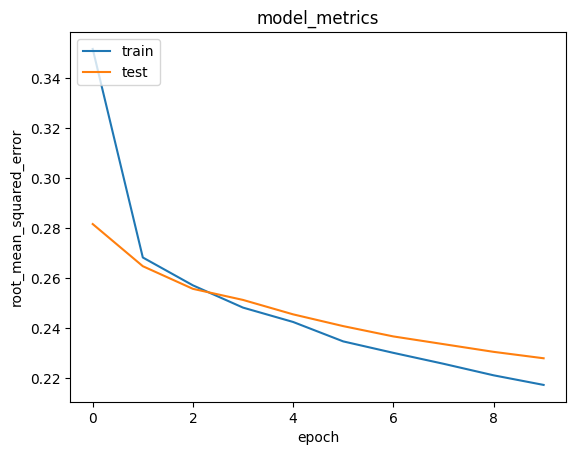

In [57]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
model.evaluate(x,y)

6609/6609 [==============================] - 14s 2ms/step - loss: 0.4935 - root_mean_squared_error: 0.2405


[0.4935360550880432, 0.24053922295570374]